# Import

In [1]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

%matplotlib inline

# Read train labels

In [2]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,id,category
0,10099.png,0
1,10216.png,0
2,10235.png,0
3,10380.png,0
4,10466.png,0


# Function - return labels

In [3]:
def return_labels(class_number):
    return train_labels[train_labels['category'] == class_number]['id']

# Class №0

In [4]:
class_number = 0
labels = return_labels(class_number)

In [5]:
examples_number = 3
examples = [img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1)) for img_name in labels[:examples_number]]

C:\Users\Dim\Anaconda2\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


* Посмотрим на примеры изображений из класса №0

C:\Users\Dim\Anaconda2\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


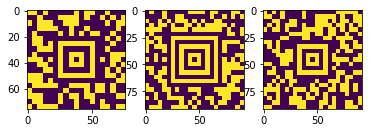

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(examples[0])
ax2.imshow(examples[1])
ax3.imshow(examples[2])
f.show()

* Заметим, что центральная часть штрихкода совпадает у данных изображений
* Размер изображений отличается

#### Попытаемся выделить центральную часть штрихкода

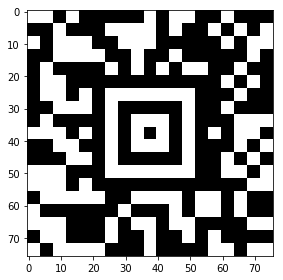

In [7]:
img = examples[0]
imshow(img)

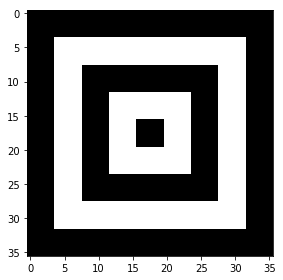

In [8]:
sample_class_0 = img[20:56, 20:56]
imshow(sample_class_0)

#### Напишем функцию для определения принадлежности классу № 0

In [9]:
def is_class_0(img):
    sample = sample_class_0
    sample_height, sample_width = sample.shape
    img_height, img_width = img.shape
    
    for i in range(img_height - sample_height):
        for j in range(img_width - sample_width):
            if np.array_equal(img[i : i + sample_height, j : j + sample_width], sample):
                return True       
    return False

* Проверим их на наших примерах из класса № 0

In [10]:
for example in examples:
    print is_class_0(example)

True
True
True


* Вроды бы всё хорошо, попробуем проверить корректность для всех элементов класса

In [11]:
coincidences_number = 0
for img_name in labels:
    img = img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1))
    coincidences_number += is_class_0(img)

print coincidences_number == len(labels)

True


* It's work!

# Class №4

In [12]:
class_number = 4
labels = return_labels(class_number)

In [13]:
examples = [img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1)) for img_name in labels[:examples_number]]

* Посмотрим на примеры изображений из класса №4

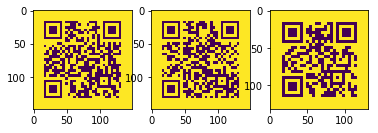

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(examples[0])
ax2.imshow(examples[1])
ax3.imshow(examples[2])
f.show()

* Размер изображений отличается
* Есть повторяющиеся элемент в углах изображений, надеюсь, что они одинаковы
#### Попытаемся выделить повторяющиеся элемент:

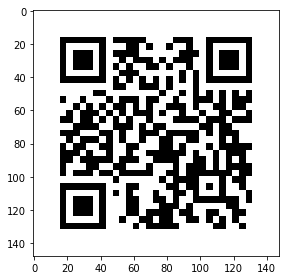

In [15]:
img = examples[0]
imshow(img)

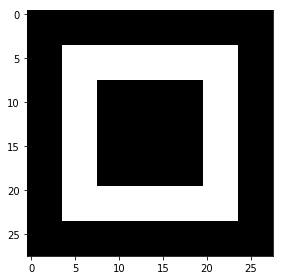

In [16]:
sample_class_4 = img[16:44, 16:44]
imshow(sample_class_4)

In [17]:
def sample_count_class_4(img):
    sample = sample_class_4
    sample_height, sample_width = sample.shape
    img_height, img_width = img.shape
    
    count = 0
    
    for i in range(img_height - sample_height):
        for j in range(img_width - sample_width):
            if np.array_equal(img[i : i + sample_height, j : j + sample_width], sample):
                count += 1       
    return count

#### Проверим количество совпадений с шаблоном на первых 10 картинках

In [18]:
for img_name in labels[:10]:
    img = img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1))
    print sample_count_class_4(img)

3
3
3
3
3
3
3
3
3
3


* Хм, видимо, моя гипотеза о трехкратном повторении того шаблона была верна
#### Проверим на всех элементах четвертого класса:

In [19]:
def is_class_4(img):
    sample = sample_class_4
    sample_height, sample_width = sample.shape
    img_height, img_width = img.shape
    count = 0
    
    for i in range(img_height - sample_height):
        for j in range(img_width - sample_width):
            if np.array_equal(img[i : i + sample_height, j : j + sample_width], sample):
                count += 1   
                
    if count == 3:
        return True
    else:
        return False

In [20]:
coincidences_number = 0
for img_name in labels[:100]:
    img = img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1))
    coincidences_number += is_class_4(img)

print coincidences_number == 100

True


# Class №2

In [21]:
class_number = 2
labels = return_labels(class_number)

In [22]:
examples = [img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1)) for img_name in labels[:examples_number]]

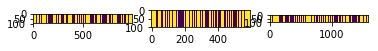

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(examples[0])
ax2.imshow(examples[1])
ax3.imshow(examples[2])
f.show()

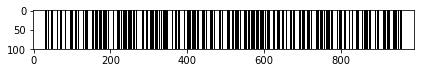

In [24]:
img = examples[0]
imshow(img)

In [25]:
ver_grad = (img[1:, :] - img[:-1, :])
hor_grad = (img[:, 1:] - img[:, :-1])

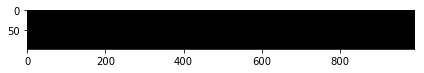

In [26]:
imshow(ver_grad)

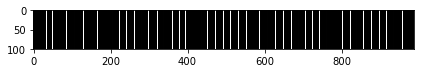

In [27]:
imshow(hor_grad)

In [28]:
np.sum(np.abs(ver_grad))

0

* Итог: у класса №2 вертикальный разностный градиент равен 0

In [29]:
def is_class_2(img):
    if img.shape[0] > img.shape[1]:
        img = img.transpose() 
        
    #обрежем границы на 5 процентов, а то в тестовой выборке этого класса есть артефакты в виде полос на границе
    k = int(round(img.shape[0] * 5 / 100)) #5%
    img = img[k : -k]
        
    ver_grad = (img[1:, :] - img[:-1, :])
    test = np.sum(np.abs(ver_grad))
        
    if test == 0:
        return True
    else:
        return False

In [30]:
coincidences_number = 0
for img_name in labels:
    img = img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1))
    coincidences_number += is_class_2(img)

print coincidences_number == len(labels)

True


# Class №3

In [31]:
class_number = 3
labels = return_labels(class_number)

In [32]:
examples = [img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1)) for img_name in labels[:examples_number]]

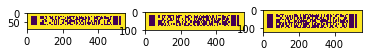

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(examples[0])
ax2.imshow(examples[1])
ax3.imshow(examples[2])
f.show()

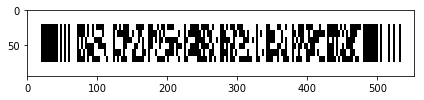

In [34]:
img = examples[0]
imshow(img)

* Вроде бы у всех элементов одинаковы поля справа и слева

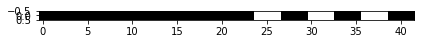

In [35]:
sample_class_3_1 = img[20:21, 20:62]
imshow(sample_class_3_1)

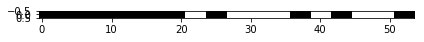

In [36]:
sample_class_3_2 = img[20:21, 479:533]
imshow(sample_class_3_2)

In [37]:
def is_class_3(img):
    if img.shape[0] > img.shape[1]:
        img = img.transpose() 
     
    #обрежем изображение для ускорения поиска
    k = int(round(img.shape[0] * 30 / 100)) #30%
    img = img[k : -k]
        
    img_height, img_width = img.shape
        
    sample_1 = sample_class_3_1
    sample_2 = sample_class_3_2
    
    sample_1_reverse = np.rot90(np.rot90(sample_1))
    sample_2_reverse = np.rot90(np.rot90(sample_2))
    
    sample_1_height, sample_1_width = sample_1.shape
    sample_2_height, sample_2_width = sample_2.shape
    
    count_sample_1, count_sample_2 = 0, 0
    lines = set()
    
    for i in range(img_height - sample_1_height):
        for j in range(img_width - sample_1_width):
            if np.array_equal(img[i : i + sample_1_height, j : j + sample_1_width], sample_1) or \
            np.array_equal(img[i : i + sample_1_height, j : j + sample_1_width], sample_1_reverse):
                count_sample_1 += 1
                lines.add(i)       
        if count_sample_1 >= 6: break
                
    for i in lines:
        for j in range(img_width - sample_2_width):
            if np.array_equal(img[i : i + sample_2_height, j : j + sample_2_width], sample_2) or \
            np.array_equal(img[i : i + sample_2_height, j : j + sample_2_width], sample_2_reverse):
                count_sample_2 += 1
    
    if count_sample_1 >= 6 and count_sample_1 == count_sample_2:
        return True
    else:
        return False

In [38]:
coincidences_number = 0
for img_name in labels[:100]:
    img = img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1))
    coincidences_number += is_class_3(img)

print coincidences_number == 100

True


# Class №1

In [39]:
class_number = 1
labels = return_labels(class_number)

In [40]:
examples = [img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1)) for img_name in labels[:examples_number]]

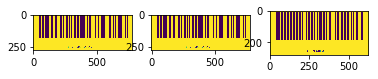

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(examples[0])
ax2.imshow(examples[1])
ax3.imshow(examples[2])
f.show()

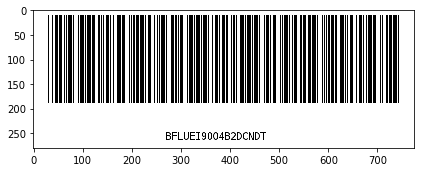

In [42]:
img = examples[0]
imshow(img)

In [43]:
def is_class_1(img):
    if img.shape[0] > img.shape[1]:
        img = img.transpose() 
        
    #обрежем изображение для ускорения поиска
    k = int(round(img.shape[0] * 5 / 100)) #5%
    img_1 = img[k : -10 * k]
        
    ver_grad = (img_1[1:, :] - img_1[:-1, :])
    test = np.sum(np.abs(ver_grad))
        
    if test == 0:
        return True
    else:
        img = np.rot90(np.rot90(img))
        img_2 = img[k : -10 * k]
        
        ver_grad = (img_2[1:, :] - img_2[:-1, :])
        test = np.sum(np.abs(ver_grad))
        
        if test == 0:
            return True
        else:
            return False

In [44]:
coincidences_number = 0
for img_name in labels[:200]:
    img = img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1))
    coincidences_number += is_class_1(img)

print coincidences_number == 200

True


# Остальные изображения будем причислять классу №5

* Проверим, что предыдущие рассуждения не применимы к классу №5

In [45]:
class_number = 5
labels = return_labels(class_number)

In [46]:
examples = [img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1)) for img_name in labels[:examples_number]]

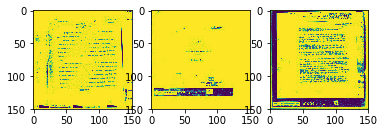

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(examples[0])
ax2.imshow(examples[1])
ax3.imshow(examples[2])
f.show()

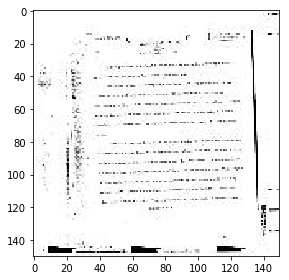

In [48]:
img = examples[0]
imshow(img)

#### Определим предсказывающую функцию

In [49]:
def predict_class(img):
    if is_class_0(img): return 0
    if is_class_4(img): return 4
    if is_class_2(img): return 2
    if is_class_3(img): return 3
    if is_class_1(img): return 1
    return 5

In [50]:
coincidences_number = 0

for img_name in labels[:20]:
    img = img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1))
    coincidences_number += (predict_class(img) == 5)

print coincidences_number == 20

True


# Сделаем предсказание для тестовой выборки:

In [51]:
with open('sampleSubmission.csv') as infile:
    reader = csv.DictReader(infile)
    
    with open('answer.csv', 'w') as outfile:
        fieldnames = ['# fname', 'class']
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()    
    
        for row in reader:
            img_name = row['# fname']
            img = img_as_ubyte(imread(os.path.join("Test", img_name), 1))
            prediction = predict_class(img)
                        
            writer.writerow({'# fname': img_name, 'class': prediction})

C:\Users\Dim\Anaconda2\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


## Класс №1

* На этих штрихкодах есть буквы/цифры

In [52]:
class_number = 1
labels = return_labels(class_number)

In [53]:
examples = [img_as_ubyte(imread(os.path.join("Train", str(class_number), img_name), 1)) for img_name in labels[:examples_number]]

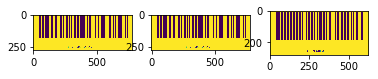

In [54]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(examples[0])
ax2.imshow(examples[1])
ax3.imshow(examples[2])
f.show()

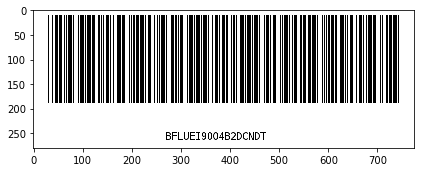

In [55]:
img = examples[0]
imshow(img)

#### Попробуем выделить буквы/цифры:

In [56]:
end_line = img.shape[0] - 1
width = img.shape[1]

In [57]:
while np.array_equal(img[end_line], np.zeros(width) + img[end_line,0]):
    end_line -= 1

In [58]:
start_line = end_line

while not np.array_equal(img[start_line], np.zeros(width) + img[start_line,0]):
    start_line -= 1

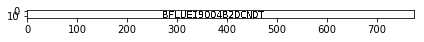

In [59]:
imshow(img[start_line:end_line])

In [60]:
img = img[start_line:end_line]
height = img.shape[0]

In [61]:
start_column = 0
while np.array_equal(img[:, start_column], np.zeros(height) + img[0, start_column]):
    start_column += 1

In [62]:
end_column = img.shape[1] - 1
while np.array_equal(img[:, end_column], np.zeros(height) + img[0, end_column]):
    end_column -= 1

In [63]:
img = img[:, start_column:end_column]

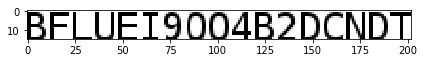

In [64]:
imshow(img)

* но дальше дело не пошло.